<a href="https://colab.research.google.com/github/rimaakhmedov/tashkent-real-estate-price-petproject/blob/main/tash_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from catboost import CatBoostRegressor

import joblib


import warnings
warnings.filterwarnings("ignore")

## EDA, Preprocessing and Feature engineering

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/olx_prices.csv', delimiter='|')

In [ ]:
df.head()

,id,title,description,type,housingType,rooms,allArea,privateArea,kitchenArea,floor,...,buildingType,planType,bathroom,setOfFurniture,inQuart,nearestStructures,repairType,district,comission,price
0,18149960,Продаётся квартира,"Просторная уютная квартира 78кв с ремонтом, ча...",Частное лицо,Вторичный рынок,3.0,78,40 м²,10 м²,10.0,...,Монолитный,Раздельная,Раздельный,Да,"Холодильник, Стиральная машина, Интернет, Кабе...","Школа, Супермаркет, магазины, Парк, зелёная зо...",Евроремонт,Яшнабадский район,Нет,80 000 у.е.
1,21005362,Продаю свою квартиру Габус Пентхаус,Продаю свою квартиру Пентхаус в Габусе Метро о...,Частное лицо,Новостройки,5.0,280,NaN,NaN,9.0,...,NaN,Пентхаус,NaN,Да,NaN,NaN,NaN,Мирабадский район,Да,420 000 у.е.
2,25747429,"Успей купить! 1ком 26м2, Новостройка! ор-р ТТЗ...","Ор-р: Мирзо-Улугбекский район, улица Буюк Ипак...",Бизнес,Новостройки,1.0,26,14 м²,7 м²,6.0,...,Кирпичный,Раздельная,NaN,Нет,NaN,"Больница, поликлиника, Детская площадка, Детск...",Черновая отделка,Яккасарайский район,Нет,32 000 у.е.
3,32021221,Продается спецплан 4/8/9 Алгоритм Г35,"Срочно продается СВОЯ спецплан4/8/9 квартира, ...",Частное лицо,Вторичный рынок,4.0,100,100 м²,NaN,8.0,...,Блочный,Раздельная,Раздельный,Да,"Телефон, Кабельное ТВ, Интернет, Кондиционер, ...","Школа, Супермаркет, магазины, Парк, зелёная зо...",Евроремонт,Алмазарский район,Нет,90 000 у.е.
4,32664730,Ибн Сино Жар Арик 2/3/4 средний,Ибн Сино Жар Арик 2/3/4 средний Ибн Сино...,Частное лицо,Вторичный рынок,2.0,48,NaN,NaN,3.0,...,NaN,NaN,Раздельный,Нет,"Интернет, Кухня, Балкон","Больница, поликлиника, Детская площадка, Детск...",Средний,Шайхантахурский район,Нет,54 000 у.е.


In [ ]:
df.shape

(4446, 21)

In [ ]:
df.isna().sum()

id                      0
title                   2
description             2
type                    2
housingType             2
rooms                   2
allArea                 2
privateArea          3206
kitchenArea          3618
floor                   2
floorsNumber            2
buildingType          734
planType             1446
bathroom             1060
setOfFurniture          4
inQuart              1955
nearestStructures    1551
repairType            743
district                2
comission               2
price                   2
dtype: int64

In [ ]:
df.describe()

,id,rooms,floor,floorsNumber
count,4.446000e+03,4444.000000,4444.000000,4444.000000
mean,5.145639e+07,2.567957,4.557156,7.323357
std,1.790111e+06,3.742153,3.529130,4.445846
min,1.814996e+07,1.000000,1.000000,1.000000
25%,5.140924e+07,2.000000,2.000000,4.000000
50%,5.192326e+07,2.000000,4.000000,7.000000
75%,5.229692e+07,3.000000,6.000000,9.000000
max,5.278757e+07,234.000000,50.000000,51.000000


In [ ]:
df.dtypes

id                     int64
title                 object
description           object
type                  object
housingType           object
rooms                float64
allArea               object
privateArea           object
kitchenArea           object
floor                float64
floorsNumber         float64
buildingType          object
planType              object
bathroom              object
setOfFurniture        object
inQuart               object
nearestStructures     object
repairType            object
district              object
comission             object
price                 object
dtype: object

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['allArea']

0        78
1       280
2        26
3       100
4        48
       ... 
4441     60
4442     56
4443     58
4444     30
4445     52
Name: allArea, Length: 4446, dtype: object

####Меняем тип данных

In [ ]:
df_copy['allArea'] = df_copy['allArea'].str.replace(' ', '').str.replace(',', '.')

df_copy['allArea'] = df_copy['allArea'].astype(float)

In [ ]:
df_copy.dtypes

id                     int64
title                 object
description           object
type                  object
housingType           object
rooms                float64
allArea              float64
privateArea           object
kitchenArea           object
floor                float64
floorsNumber         float64
buildingType          object
planType              object
bathroom              object
setOfFurniture        object
inQuart               object
nearestStructures     object
repairType            object
district              object
comission             object
price                 object
dtype: object

In [ ]:
def remove_square_meters(text):
    text = str(text)
    return text.replace('м²', '')

In [ ]:
df_copy['privateArea'] = df_copy['privateArea'].apply(remove_square_meters)

In [ ]:
df_copy['privateArea'] = df_copy['privateArea'].str.replace(' ', '').str.replace(',', '.')
df_copy['privateArea'] = df_copy['privateArea'].astype(float)

In [ ]:
df_copy['privateArea']

0        40.0
1         NaN
2        14.0
3       100.0
4         NaN
        ...  
4441      NaN
4442      NaN
4443      NaN
4444      NaN
4445     52.0
Name: privateArea, Length: 4446, dtype: float64

In [ ]:
df_copy['kitchenArea'] = df_copy['kitchenArea'].apply(remove_square_meters)
df_copy['kitchenArea'] = df_copy['kitchenArea'].str.replace(' ', '').str.replace(',', '.')
df_copy['kitchenArea'] = df_copy['kitchenArea'].astype(float)
df_copy['kitchenArea']

0       10.0
1        NaN
2        7.0
3        NaN
4        NaN
        ... 
4441     NaN
4442     NaN
4443     NaN
4444     NaN
4445     NaN
Name: kitchenArea, Length: 4446, dtype: float64

####Удаляем ненужные столбцы

In [ ]:
#df_copy = df_copy.drop(['id', 'title', 'description'], axis=1)

####Работаем со значением цен. Убираем символы и конвертируем uzs в у.е

In [ ]:
df_copy['price']

0        80 000 у.е.
1       420 000 у.е.
2        32 000 у.е.
3        90 000 у.е.
4        54 000 у.е.
            ...     
4441     91 000 у.е.
4442     74 500 у.е.
4443     71 500 у.е.
4444     54 000 у.е.
4445     48 000 у.е.
Name: price, Length: 4446, dtype: object

In [ ]:
currencies = df_copy['price'].str.extract(r'([a-zA-Zа-яА-Я]+)').dropna()[0].unique()

print(currencies)

['у' 'сум']


In [ ]:
nan_rows = df_copy[df_copy['price'].isna()]

nan_rows

,id,title,description,type,housingType,rooms,allArea,privateArea,kitchenArea,floor,...,buildingType,planType,bathroom,setOfFurniture,inQuart,nearestStructures,repairType,district,comission,price
2984,52177468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3914,52435375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_copy = df_copy[df_copy['price'].notna()]

df_copy.shape

(4444, 21)

In [ ]:
filtered_df = df_copy[df_copy['price'].str.contains('сум')]

filtered_df.head(3)

,id,title,description,type,housingType,rooms,allArea,privateArea,kitchenArea,floor,...,buildingType,planType,bathroom,setOfFurniture,inQuart,nearestStructures,repairType,district,comission,price
5,35500820,"Продажа квартир ЖК""STATUS"", Карасу 6, Авайхон,...","Жилой Комплекс ""STATUS"".- Мирзо Улугбекский ра...",Бизнес,Новостройки,2.0,53.5,NaN,NaN,6.0,...,Кирпичный,Раздельная,Раздельный,Нет,"Кухня, Телефон, Балкон, Кабельное ТВ, Интернет","Рестораны, кафе, Детский сад, Стоянка, Останов...",Черновая отделка,Мирзо-Улугбекский район,Нет,590 000 000 сум
33,43528199,продается квартира рассрочка есть,имеетсяПодземная отдельно стоящая парковка во ...,Бизнес,Новостройки,2.0,53.0,NaN,NaN,3.0,...,Кирпичный,Смежно-раздельная,Совмещенный,Нет,NaN,"Остановки, Парк, зелёная зона, Рестораны, кафе...",Черновая отделка,Юнусабадский район,Нет,391 400 000 сум
34,43532729,квартира продается рассрочка есть,Высота от пола до потолка 3 мтип строения дома...,Бизнес,Новостройки,2.0,52.0,NaN,NaN,1.0,...,Кирпичный,Смежно-раздельная,Совмещенный,Нет,NaN,"Детская площадка, Остановки, Парк, зелёная зон...",Черновая отделка,Юнусабадский район,Нет,391 400 000 сум


In [ ]:
ids = filtered_df['id'].values.tolist()

print(ids)

[35500820, 43528199, 43532729, 45517772, 45706104, 45716699, 45863953, 45905267, 46775381, 46775494, 46775630, 46826611, 47095400, 48642770, 49689012, 49734082, 49775612, 49861577, 49889190, 50179999, 50806533, 50860265, 50860370, 50919296, 50919504, 51023382, 51253677, 51303276, 51327761, 51423093, 51443191, 51511130, 51542718, 51700571, 51701838, 51705015, 51715363, 51734614, 51744378, 51744466, 51744619, 51759740, 51810278, 51814014, 51859165, 51875717, 51908450, 51909766, 51925887, 51925922, 51925925, 51962775, 52100519, 52113488, 52115402, 52115630, 52152654, 52173377, 52173378, 52174840, 52177359, 52210497, 52222330, 52265756, 52293833, 52306000, 52347664, 52347777, 52385991, 52431528, 52506153, 52520877, 52534042, 52560217, 52560668, 52561468, 52561771, 52650980]


In [ ]:
df_copy_1 = df_copy.copy()

In [ ]:
df_copy_1['price'] = df_copy_1['price'].str.replace('сум', '')

In [ ]:
df_copy_1.loc[df_copy_1['id'] == 35500820]

,id,title,description,type,housingType,rooms,allArea,privateArea,kitchenArea,floor,...,buildingType,planType,bathroom,setOfFurniture,inQuart,nearestStructures,repairType,district,comission,price
5,35500820,"Продажа квартир ЖК""STATUS"", Карасу 6, Авайхон,...","Жилой Комплекс ""STATUS"".- Мирзо Улугбекский ра...",Бизнес,Новостройки,2.0,53.5,NaN,NaN,6.0,...,Кирпичный,Раздельная,Раздельный,Нет,"Кухня, Телефон, Балкон, Кабельное ТВ, Интернет","Рестораны, кафе, Детский сад, Стоянка, Останов...",Черновая отделка,Мирзо-Улугбекский район,Нет,590 000 000


In [ ]:
df_copy_1['price'] = df_copy_1['price'].str.replace(r'\D', '', regex=True)

df_copy_1['price']

0        80000
1       420000
2        32000
3        90000
4        54000
         ...  
4441     91000
4442     74500
4443     71500
4444     54000
4445     48000
Name: price, Length: 4444, dtype: object

In [ ]:
df_copy_1['price'] = df_copy_1['price'].astype(float)

In [ ]:
df_copy_1['price']

0        80000.0
1       420000.0
2        32000.0
3        90000.0
4        54000.0
          ...   
4441     91000.0
4442     74500.0
4443     71500.0
4444     54000.0
4445     48000.0
Name: price, Length: 4444, dtype: float64

In [ ]:
df_copy_1.loc[df_copy_1['id'].isin(ids), 'price'] = (df_copy_1.loc[df_copy_1['id'].isin(ids), 'price'] / 12660).round(1)

In [ ]:
df_copy_1.loc[df_copy_1['id'] == 35500820]

,id,title,description,type,housingType,rooms,allArea,privateArea,kitchenArea,floor,...,buildingType,planType,bathroom,setOfFurniture,inQuart,nearestStructures,repairType,district,comission,price
5,35500820,"Продажа квартир ЖК""STATUS"", Карасу 6, Авайхон,...","Жилой Комплекс ""STATUS"".- Мирзо Улугбекский ра...",Бизнес,Новостройки,2.0,53.5,NaN,NaN,6.0,...,Кирпичный,Раздельная,Раздельный,Нет,"Кухня, Телефон, Балкон, Кабельное ТВ, Интернет","Рестораны, кафе, Детский сад, Стоянка, Останов...",Черновая отделка,Мирзо-Улугбекский район,Нет,46603.5


#### Удаляем столбцы с большим количеством пропусков т.к они не несут никакой информации

In [ ]:
df_copy_2 = df_copy_1.drop(['title', 'description', 'privateArea', 'kitchenArea', 'inQuart', 'nearestStructures'], axis=1)

####Заполняем пропуски у столбцов

In [ ]:
df_copy_2.isna().sum()

id                   0
type                 0
housingType          0
rooms                0
allArea              0
floor                0
floorsNumber         0
buildingType       732
planType          1444
bathroom          1058
setOfFurniture       2
repairType         741
district             0
comission            0
price                0
dtype: int64

####buildingType

In [ ]:
cross_tab = pd.crosstab(df_copy_2['housingType'], df_copy_2['buildingType'])
cross_tab

buildingType,Блочный,Деревянный,Кирпичный,Монолитный,Панельный
housingType,,,,,
Вторичный рынок,11,2,1015,110,1106
Новостройки,63,0,1170,184,51


In [ ]:
def fill_building_type(row):
    if row['housingType'] == 'Вторичный рынок':
        return 'Кирпичный' if pd.isnull(row['buildingType']) else row['buildingType']
    elif row['housingType'] == 'Новостройки':
        return 'Кирпичный' if pd.isnull(row['buildingType']) else row['buildingType']
    else:
        return row['buildingType']

In [ ]:
df_copy_2['buildingType'] = df_copy_2.apply(fill_building_type, axis=1)

####planType

In [ ]:
result = df_copy_2.groupby('planType').size().reset_index(name='Count')
result

,planType,Count
0,Малосемейка,17
1,Многоуровневая,18
2,Пентхаус,7
3,Раздельная,2292
4,Смежная,316
5,Смежно-раздельная,231
6,Студия,119


In [ ]:
df_copy_2['planType'].fillna('Раздельная', inplace=True)

####bathroom

In [ ]:
bathroom_count = df_copy_2.groupby('bathroom').size().reset_index(name='Count')
bathroom_count

,bathroom,Count
0,2 санузла и более,370
1,Раздельный,1994
2,Совмещенный,1022


In [ ]:
missing_count = df_copy_2['bathroom'].isnull().sum()

# Распределение пропусков между значениями 'Раздельный' и 'Совмещенный' в соотношении 50:50
fill_values = np.random.choice(['Раздельный', 'Совмещенный'], size=missing_count, p=[0.5, 0.5])

# Заполнение пропущенных значений в столбце 'bathroom'
df_copy_2.loc[df_copy_2['bathroom'].isnull(), 'bathroom'] = fill_values

####repairType

In [ ]:
repair_c = df_copy_2.groupby('repairType').size().reset_index(name='Count')
repair_c

,repairType,Count
0,Авторский проект,498
1,Евроремонт,1572
2,Предчистовая отделка,71
3,Средний,995
4,Требует ремонта,242
5,Черновая отделка,325


In [ ]:
df_copy_2['repairType'].fillna('Евроремонт', inplace=True)

In [ ]:
df_copy_2.isna().sum()

id                0
type              0
housingType       0
rooms             0
allArea           0
floor             0
floorsNumber      0
buildingType      0
planType          0
bathroom          0
setOfFurniture    2
repairType        0
district          0
comission         0
price             0
dtype: int64

####setOfFurn

In [ ]:
rows_with_missing_values = df_copy_2[df_copy_2['setOfFurniture'].isnull()]

rows_with_missing_values

,id,type,housingType,rooms,allArea,floor,floorsNumber,buildingType,planType,bathroom,setOfFurniture,repairType,district,comission,price
2432,52003463,Частное лицо,Новостройки,4.0,92.0,5.0,5.0,Панельный,Раздельная,Совмещенный,NaN,Евроремонт,Сергелийский район,Нет,90000.0
2464,52009080,Бизнес,Вторичный рынок,3.0,90.0,5.0,5.0,Кирпичный,Раздельная,Раздельный,NaN,Евроремонт,Яшнабадский район,Да,90000.0


In [ ]:
df_copy_2['setOfFurniture'].fillna('Да', inplace=True)

### Charts

In [ ]:
df_copy_3 = df_copy_2.drop('id', axis=1)
df_copy_3

,type,housingType,rooms,allArea,floor,floorsNumber,buildingType,planType,bathroom,setOfFurniture,repairType,district,comission,price
0,Частное лицо,Вторичный рынок,3.0,78.0,10.0,12.0,Монолитный,Раздельная,Раздельный,Да,Евроремонт,Яшнабадский район,Нет,80000.0
1,Частное лицо,Новостройки,5.0,280.0,9.0,9.0,Кирпичный,Пентхаус,Совмещенный,Да,Евроремонт,Мирабадский район,Да,420000.0
2,Бизнес,Новостройки,1.0,26.0,6.0,8.0,Кирпичный,Раздельная,Совмещенный,Нет,Черновая отделка,Яккасарайский район,Нет,32000.0
3,Частное лицо,Вторичный рынок,4.0,100.0,8.0,9.0,Блочный,Раздельная,Раздельный,Да,Евроремонт,Алмазарский район,Нет,90000.0
4,Частное лицо,Вторичный рынок,2.0,48.0,3.0,4.0,Кирпичный,Раздельная,Раздельный,Нет,Средний,Шайхантахурский район,Нет,54000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,Бизнес,Вторичный рынок,2.0,60.0,2.0,4.0,Кирпичный,Раздельная,Раздельный,Нет,Требует ремонта,Мирабадский район,Нет,91000.0
4442,Бизнес,Вторичный рынок,2.0,56.0,1.0,5.0,Панельный,Раздельная,Раздельный,Да,Средний,Шайхантахурский район,Нет,74500.0
4443,Бизнес,Вторичный рынок,2.0,58.0,4.0,4.0,Панельный,Раздельная,Раздельный,Нет,Евроремонт,Учтепинский район,Нет,71500.0
4444,Бизнес,Вторичный рынок,1.0,30.0,4.0,4.0,Кирпичный,Раздельная,Совмещенный,Да,Евроремонт,Чиланзарский район,Нет,54000.0


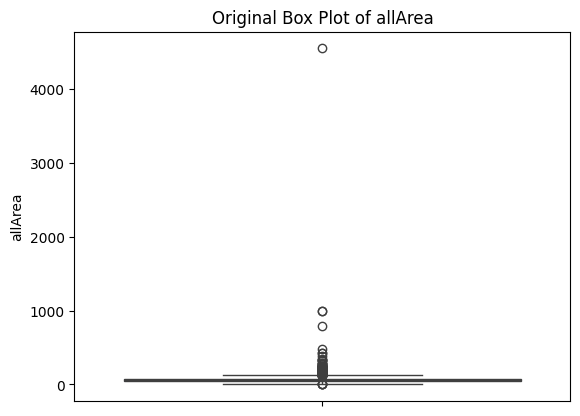

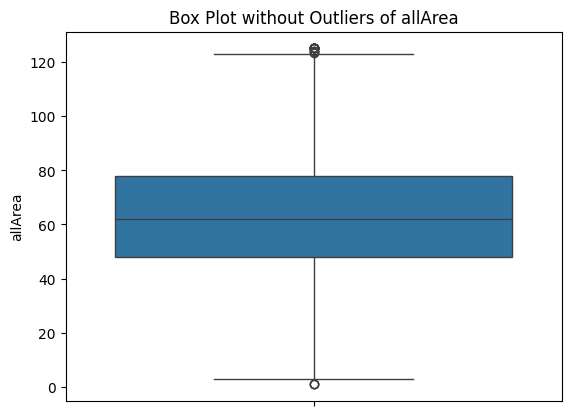

In [ ]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 125

no_outliers = removal_box_plot(df_copy_3, 'allArea', threshold_value)

In [ ]:
df_copy_4 = df_copy_3[df_copy_3['allArea'] <= 125]

In [ ]:
df_copy_4.shape

(4229, 14)

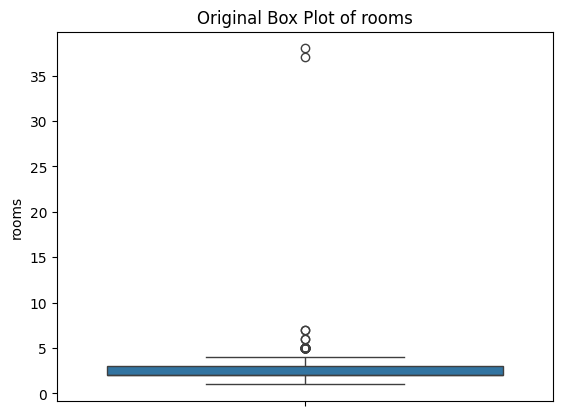

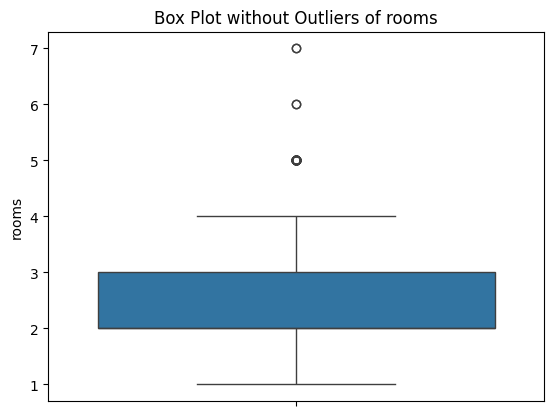

In [ ]:
threshold_value = 10

no_outliers = removal_box_plot(df_copy_4, 'rooms', threshold_value)

In [ ]:
df_copy_5 = df_copy_4[df_copy_4['rooms'] <= 10]

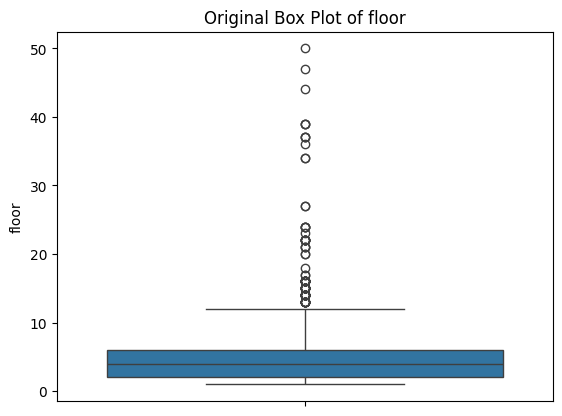

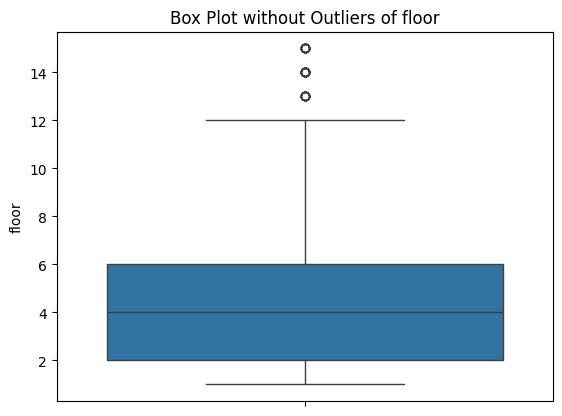

In [ ]:
threshold_value = 15

no_outliers = removal_box_plot(df_copy_5, 'floor', threshold_value)

In [ ]:
df_copy_6 = df_copy_5[df_copy_5['floor'] <= 15]

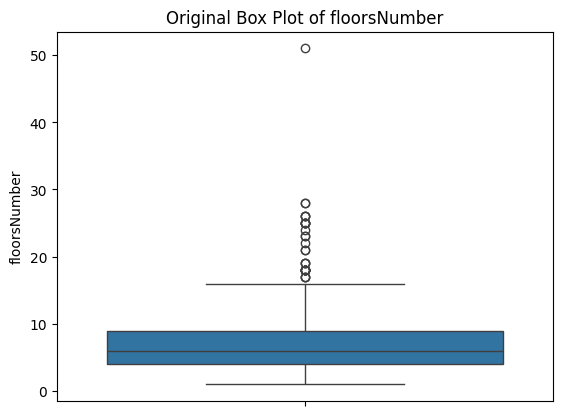

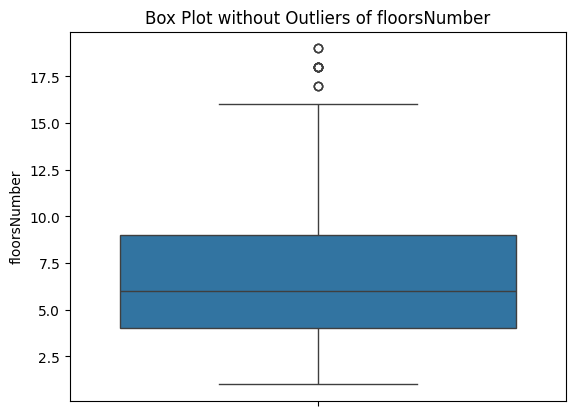

In [ ]:
threshold_value = 20

no_outliers = removal_box_plot(df_copy_6, 'floorsNumber', threshold_value)

In [ ]:
df_copy_7 = df_copy_6[df_copy_6['floorsNumber'] <= 20]

In [ ]:
df_copy_7.shape

(4162, 14)

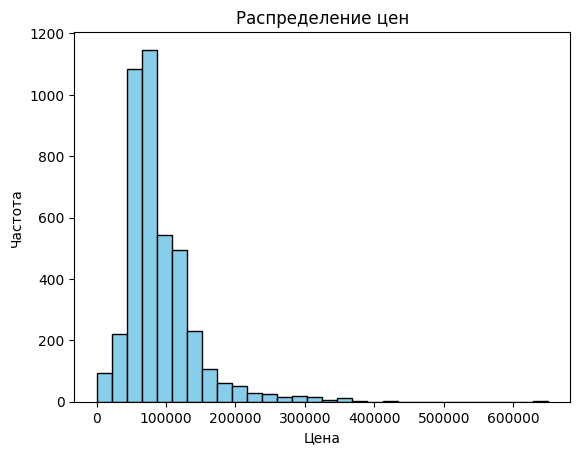

In [ ]:
plt.hist(df_copy_7['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен')
plt.show()

###Feature Engineering

In [ ]:
df_copy_7

,type,housingType,rooms,allArea,floor,floorsNumber,buildingType,planType,bathroom,setOfFurniture,repairType,district,comission,price
0,Частное лицо,Вторичный рынок,3.0,78.0,10.0,12.0,Монолитный,Раздельная,Раздельный,Да,Евроремонт,Яшнабадский район,Нет,80000.0
2,Бизнес,Новостройки,1.0,26.0,6.0,8.0,Кирпичный,Раздельная,Совмещенный,Нет,Черновая отделка,Яккасарайский район,Нет,32000.0
3,Частное лицо,Вторичный рынок,4.0,100.0,8.0,9.0,Блочный,Раздельная,Раздельный,Да,Евроремонт,Алмазарский район,Нет,90000.0
4,Частное лицо,Вторичный рынок,2.0,48.0,3.0,4.0,Кирпичный,Раздельная,Раздельный,Нет,Средний,Шайхантахурский район,Нет,54000.0
5,Бизнес,Новостройки,2.0,53.5,6.0,9.0,Кирпичный,Раздельная,Раздельный,Нет,Черновая отделка,Мирзо-Улугбекский район,Нет,46603.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,Бизнес,Вторичный рынок,2.0,60.0,2.0,4.0,Кирпичный,Раздельная,Раздельный,Нет,Требует ремонта,Мирабадский район,Нет,91000.0
4442,Бизнес,Вторичный рынок,2.0,56.0,1.0,5.0,Панельный,Раздельная,Раздельный,Да,Средний,Шайхантахурский район,Нет,74500.0
4443,Бизнес,Вторичный рынок,2.0,58.0,4.0,4.0,Панельный,Раздельная,Раздельный,Нет,Евроремонт,Учтепинский район,Нет,71500.0
4444,Бизнес,Вторичный рынок,1.0,30.0,4.0,4.0,Кирпичный,Раздельная,Совмещенный,Да,Евроремонт,Чиланзарский район,Нет,54000.0


In [ ]:
object_columns = df_copy_7.select_dtypes(include=['object']).columns.tolist()

# Вывод списка столбцов
print("Столбцы с типом данных 'object':", object_columns)

Столбцы с типом данных 'object': ['type', 'housingType', 'buildingType', 'planType', 'bathroom', 'setOfFurniture', 'repairType', 'district', 'comission']


In [ ]:
encoded_df = pd.get_dummies(df_copy_7, columns=object_columns)

In [ ]:
encoded_df.head()

,rooms,allArea,floor,floorsNumber,price,type_Бизнес,type_Частное лицо,housingType_Вторичный рынок,housingType_Новостройки,buildingType_Блочный,...,district_Мирзо-Улугбекский район,district_Сергелийский район,district_Учтепинский район,district_Чиланзарский район,district_Шайхантахурский район,district_Юнусабадский район,district_Яккасарайский район,district_Яшнабадский район,comission_Да,comission_Нет
0,3.0,78.0,10.0,12.0,80000.0,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,True
2,1.0,26.0,6.0,8.0,32000.0,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,4.0,100.0,8.0,9.0,90000.0,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,2.0,48.0,3.0,4.0,54000.0,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
5,2.0,53.5,6.0,9.0,46603.5,True,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
bool_columns = encoded_df.select_dtypes(include=['bool']).columns.tolist()

In [ ]:
replace_dict = {True: 1, False: 0}

# Преобразование значений True и False в 0 и 1 только в определенных столбцах
encoded_df[encoded_df.columns.intersection(bool_columns)] = encoded_df[encoded_df.columns.intersection(bool_columns)].replace(replace_dict)

In [ ]:
encoded_df.head()

,rooms,allArea,floor,floorsNumber,price,type_Бизнес,type_Частное лицо,housingType_Вторичный рынок,housingType_Новостройки,buildingType_Блочный,...,district_Мирзо-Улугбекский район,district_Сергелийский район,district_Учтепинский район,district_Чиланзарский район,district_Шайхантахурский район,district_Юнусабадский район,district_Яккасарайский район,district_Яшнабадский район,comission_Да,comission_Нет
0,3.0,78.0,10.0,12.0,80000.0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1.0,26.0,6.0,8.0,32000.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4.0,100.0,8.0,9.0,90000.0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2.0,48.0,3.0,4.0,54000.0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,2.0,53.5,6.0,9.0,46603.5,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
encoded_df.columns

Index(['rooms', 'allArea', 'floor', 'floorsNumber', 'price', 'type_Бизнес',
       'type_Частное лицо', 'housingType_Вторичный рынок',
       'housingType_Новостройки', 'buildingType_Блочный',
       'buildingType_Деревянный', 'buildingType_Кирпичный',
       'buildingType_Монолитный', 'buildingType_Панельный',
       'planType_Малосемейка', 'planType_Многоуровневая', 'planType_Пентхаус',
       'planType_Раздельная', 'planType_Смежная', 'planType_Смежно-раздельная',
       'planType_Студия', 'bathroom_2 санузла и более', 'bathroom_Раздельный',
       'bathroom_Совмещенный', 'setOfFurniture_Да', 'setOfFurniture_Нет',
       'repairType_Авторский проект', 'repairType_Евроремонт',
       'repairType_Предчистовая отделка', 'repairType_Средний',
       'repairType_Требует ремонта', 'repairType_Черновая отделка',
       'district_Алмазарский район', 'district_Бектемирский район',
       'district_Мирабадский район', 'district_Мирзо-Улугбекский район',
       'district_Сергелийский район', '

In [ ]:
encoded_df.columns = encoded_df.columns.str.replace(' ', '_')
encoded_df.columns

Index(['rooms', 'allArea', 'floor', 'floorsNumber', 'price', 'type_Бизнес',
       'type_Частное_лицо', 'housingType_Вторичный_рынок',
       'housingType_Новостройки', 'buildingType_Блочный',
       'buildingType_Деревянный', 'buildingType_Кирпичный',
       'buildingType_Монолитный', 'buildingType_Панельный',
       'planType_Малосемейка', 'planType_Многоуровневая', 'planType_Пентхаус',
       'planType_Раздельная', 'planType_Смежная', 'planType_Смежно-раздельная',
       'planType_Студия', 'bathroom_2_санузла_и_более', 'bathroom_Раздельный',
       'bathroom_Совмещенный', 'setOfFurniture_Да', 'setOfFurniture_Нет',
       'repairType_Авторский_проект', 'repairType_Евроремонт',
       'repairType_Предчистовая_отделка', 'repairType_Средний',
       'repairType_Требует_ремонта', 'repairType_Черновая_отделка',
       'district_Алмазарский_район', 'district_Бектемирский_район',
       'district_Мирабадский_район', 'district_Мирзо-Улугбекский_район',
       'district_Сергелийский_район', '

## Standartization/Normalization

In [ ]:
df_copy_8 = encoded_df.copy()

In [ ]:
X = df_copy_8.drop('price', axis=1)
y = df_copy_8.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3006, 44)
(531, 44)
(625, 44)


In [ ]:
scaler = RobustScaler()

In [ ]:
X_numeric = X_train.iloc[:, :4]
X_numeric_normalized = scaler.fit_transform(X_numeric)
X_train.iloc[:, :4] = X_numeric_normalized

In [ ]:
X_numeric = X_val.iloc[:, :4]
X_numeric_normalized = scaler.transform(X_numeric)
X_val.iloc[:, :4] = X_numeric_normalized

In [ ]:
X_numeric = X_test.iloc[:, :4]
X_numeric_normalized = scaler.transform(X_numeric)
X_test.iloc[:, :4] = X_numeric_normalized

In [ ]:
X_train.columns

Index(['rooms', 'allArea', 'floor', 'floorsNumber', 'type_Бизнес',
       'type_Частное_лицо', 'housingType_Вторичный_рынок',
       'housingType_Новостройки', 'buildingType_Блочный',
       'buildingType_Деревянный', 'buildingType_Кирпичный',
       'buildingType_Монолитный', 'buildingType_Панельный',
       'planType_Малосемейка', 'planType_Многоуровневая', 'planType_Пентхаус',
       'planType_Раздельная', 'planType_Смежная', 'planType_Смежно-раздельная',
       'planType_Студия', 'bathroom_2_санузла_и_более', 'bathroom_Раздельный',
       'bathroom_Совмещенный', 'setOfFurniture_Да', 'setOfFurniture_Нет',
       'repairType_Авторский_проект', 'repairType_Евроремонт',
       'repairType_Предчистовая_отделка', 'repairType_Средний',
       'repairType_Требует_ремонта', 'repairType_Черновая_отделка',
       'district_Алмазарский_район', 'district_Бектемирский_район',
       'district_Мирабадский_район', 'district_Мирзо-Улугбекский_район',
       'district_Сергелийский_район', 'district_

## Обучение

####CatBoost

In [ ]:
cat_reg = CatBoostRegressor(random_state=42)

In [ ]:
params_grid = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

# Create instance of GridSearchCV Model
grid_search = GridSearchCV(cat_reg, params_grid, scoring='r2', cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
250:	learn: 47810.3105728	total: 232ms	remaining: 230ms
251:	learn: 47796.9977546	total: 233ms	remaining: 229ms
252:	learn: 47780.9271961	total: 234ms	remaining: 228ms
253:	learn: 47765.2722330	total: 235ms	remaining: 227ms
254:	learn: 47750.3871519	total: 235ms	remaining: 226ms
255:	learn: 47735.3792415	total: 236ms	remaining: 225ms
256:	learn: 47720.8890622	total: 237ms	remaining: 224ms
257:	learn: 47705.1175440	total: 238ms	remaining: 223ms
258:	learn: 47688.9865926	total: 239ms	remaining: 222ms
259:	learn: 47674.3016726	total: 240ms	remaining: 221ms
260:	learn: 47659.2057947	total: 241ms	remaining: 220ms
261:	learn: 47643.1408183	total: 241ms	remaining: 219ms
262:	learn: 47627.6609654	total: 242ms	remaining: 218ms
263:	learn: 47613.4853014	total: 243ms	remaining: 217ms
264:	learn: 47599.3290739	total: 244ms	remaining: 216ms
265:	learn: 47584.4834896	total: 245ms	remaining: 215ms
266:	learn: 47571.1156984	total: 246

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e63f681d2a0>,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [-1, 3, 5],
                         'n_estimators': [50, 100, 200, 500],
                         'num_leaves': [7, 14, 21, 28, 31, 50]},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'num_leaves': 31}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("r2:", r2)

r2: 0.6332510538097249


In [ ]:
result_df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
result_df

,y_true,y_pred
3398,45500.0,46822.310993
3842,78000.0,36706.976869
208,79000.0,75392.751162
360,95000.0,101601.371141
2976,49500.0,57047.442320
...,...,...
408,65000.0,71032.466570
975,69000.0,79061.033566
4352,130000.0,119417.710563
3515,67000.0,44205.463920


Скачаем модель и scaler

In [ ]:
joblib.dump(scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']

In [ ]:
best_model.save_model('catboost_model.bin')